# STAT3612 Lecture 1 - Machine Learning Preview

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3622 Data Visualization](http://www.statsoft.org/teaching/stat3622/)

17 January 2019

## Polynomial Regression

**Related topics**: Parametric regression, linear modeling, curve fitting, basis expansion, degrees of freedom

In [101]:
import numpy as np 
import matplotlib.pyplot as plt

def ffun(x):
    return np.exp(-(x-3)**2)

x = np.arange(0.1, 4.0, 0.1)
np.random.seed(2019)
y = ffun(x) + 0.1*np.random.normal(0, 1, len(x))
x = x.reshape([-1,1])
y = y.reshape([-1,1])

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RankWarning: Polyfit may be poorly conditioned


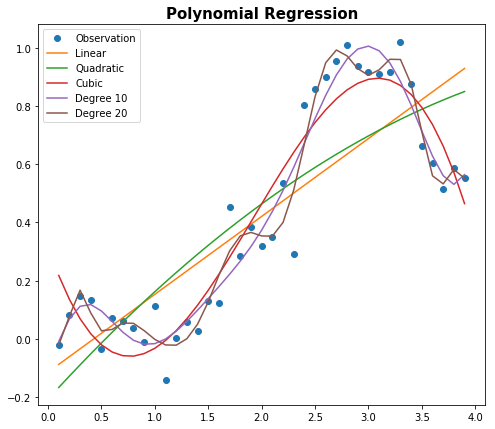

In [102]:
from sklearn.linear_model import LinearRegression

plt.figure(1, figsize=(8, 7))
plt.plot(x,y,'o')

for df in [1, 2, 3, 10, 20]:
    weights = np.polyfit(x.flatten(), y.flatten(), df)
    model = np.poly1d(weights)
    pred = model(x)
    pred_plot = model(x)
    plt.plot(x, pred_plot)
plt.legend(["Observation","Linear", "Quadratic","Cubic","Degree 10","Degree 20"])
plt.title("Polynomial Regression", fontsize=15, fontweight="bold")
plt.show()

## Smoothing Splines

**Related topics**:  Nonparametric regression, smoothing, underfitting, overfitting, cross-validation

Text(0.5,1,'Smoothing Spline')

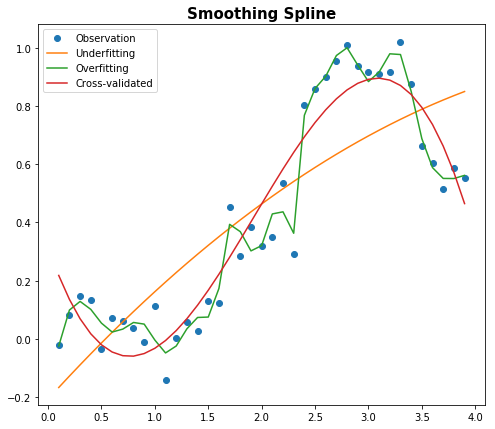

In [127]:
from scipy.interpolate import UnivariateSpline
from numpy import linspace,exp
from numpy.random import randn
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 7))
plt.plot(x,y,'o')

model = UnivariateSpline(x, y, k=2)
plt.plot(x, model(x))
model = UnivariateSpline(x, y, s = 0.1)
plt.plot(x, model(x))
model = UnivariateSpline(x, y)
plt.plot(x, model(x))
plt.legend(["Observation", "Underfitting", "Overfitting", "Cross-validated"])
plt.title("Smoothing Spline", fontsize=15, fontweight="bold")

## Logistic Regression

**Related topics**: Classification problem, linear classifier, prediction accuracy

In [131]:
import pandas as pd
import matplotlib.colors as col

DataX = pd.read_csv("mixture.csv", index_col = [0])
cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = col.ListedColormap(['#FF0000', '#00FF00'])

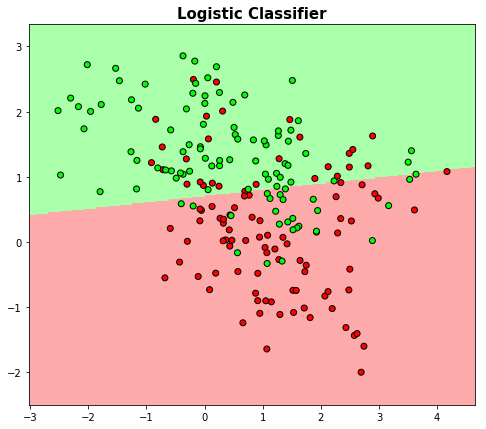

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

x = DataX.iloc[:,:2].values 
y = DataX.iloc[:,2:].values
logreg = LogisticRegression(C=1e5)
logreg.fit(x, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[:, 0:1], x[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("Logistic Classifier", fontsize=15, fontweight="bold")
plt.show()

## k-Nearest Neighbors

**Related topics**: Instance-based method, bias-variance tradeoff

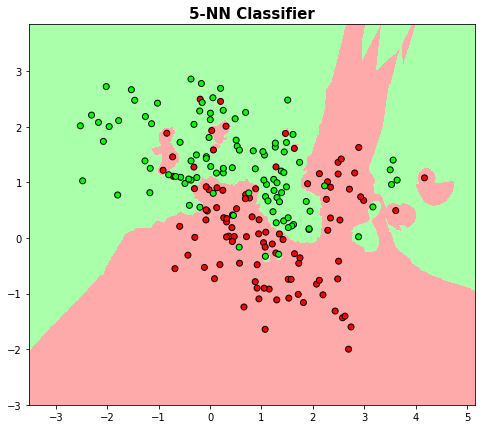

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='distance')
clf.fit(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[:, 0:1], x[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("5-NN Classifier", fontsize=15, fontweight="bold")
plt.show()

## Decision Tree

**Related topics**: recursive partitioning, piecewise constant

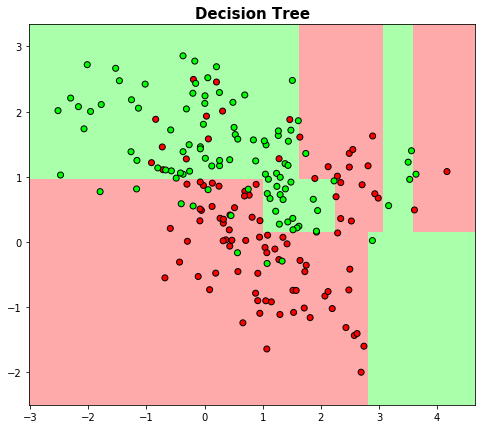

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4).fit(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[:, 0:1], x[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("Decision Tree", fontsize=15, fontweight="bold")
plt.show()

## Support Vector Machine

**Related topics:** RBF kernel, hyperparameter tuning

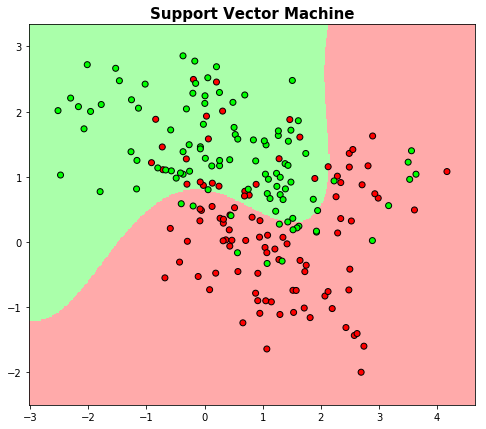

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

clf = svm.SVC(kernel = 'rbf', gamma=0.3)
clf.fit(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[:, 0:1], x[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("Support Vector Machine", fontsize=15, fontweight="bold")
plt.show()

## Neural Networks

**Related Topics:** hidden layer, activation function, multi-layer perceptron

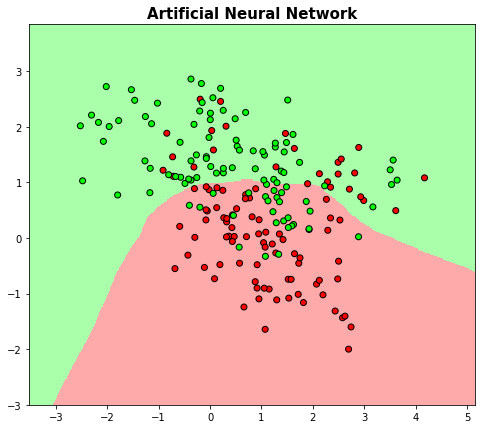

In [165]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
clf = MLPRegressor(hidden_layer_sizes = [100], activation='relu', solver='adam')
clf.fit(x, y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])>0.5
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x[:, 0:1], x[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
plt.title("Artificial Neural Network", fontsize=15, fontweight="bold")
plt.show()

## K-Means Clustering

**Related Topics:** Unsupervised learning, metric-based clustering

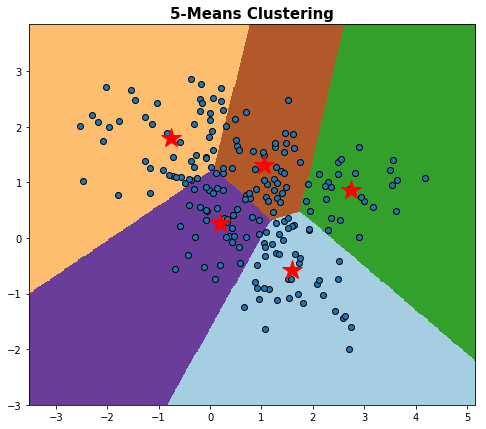

In [181]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(x)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 7))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],'*', markersize=20, color="red")
plt.scatter(x[:, 0:1], x[:, 1:2], edgecolors='k')
plt.title("5-Means Clustering", fontsize=15, fontweight="bold")
plt.show()